<img src="https://www.dropbox.com/s/l93ecugg1jbtjiw/fga.png?raw=1" width="1200" height="400">
<ul>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/3) Atividade Prática Avaliativa
    Entrega da Atividade 27/07/2022 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol> 
<li> Colete os preços e volumes de um conjunto de ativos durante o período de 10 (dez) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (trinta) ativos mais líquidos; </li><p></p>
    <li> Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis); </li> <p></p>
    <li> Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe); </li><p></p>
    <li> Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de R$100.000,00; </li><p></p>
    <li> Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa; </li><p></p>
    <li> Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados. </li>
</ol>
</div>

In [5]:
# (opcional) Instalar bibliotecas
#!pip install yfinance
!pip install investpy

  Using cached investpy-1.0.7-py3-none-any.whl
  Using cached lxml-4.9.1-cp36-cp36m-win_amd64.whl (3.7 MB)
  Using cached Unidecode-1.3.4-py3-none-any.whl (235 kB)
  Using cached setuptools-59.6.0-py3-none-any.whl (952 kB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached pandas-1.1.5-cp36-cp36m-win_amd64.whl (8.7 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached certifi-2022.6.15-py3-none-any.whl (160 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2017.2


ERROR: Cannot uninstall 'pytz'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [9]:
#Importando Modulos
import pandas as pd
#import investpy
#import yfinance as yf
#from tqdm.notebook import tqdm
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import datetime as dt
#plt.style.use('dark_background')

### Download e tratamento dos dados do IBOV para comparação

In [3]:
#scrating dos nomes das acoes que compoem o indice Ibovespa no site da B3

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
df[0]['Código'].values

array(['ABEV3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4',
       'BBSE3', 'BEEF3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5',
       'BRML3', 'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3',
       'CPLE6', 'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3',
       'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11',
       'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4',
       'HAPV3', 'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4',
       'JBSS3', 'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3',
       'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4',
       'PRIO3', 'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3',
       'SULA11', 'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5',
       'VALE3', 'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3',
       'Quantidade Teórica Total  Redutor'], dtype=object)

In [4]:
# baixa os simbolos de todos os ativos listados na b3
def historicalDay(coin,yesterdayB,todayB):
    df = yf.download(coin, start=str(yesterdayB), end=str(todayB)) 
    df=df[df.columns[:4]]
    return df

df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
symbols=[sy+".SA" for sy in symbols[:-1]]  #concatena a string "SA" e elimina a ultima linha pois é lixo

np.array(symbols)

array(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA',
       'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA',
       'BRAP4.SA', 'BRDT3.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA',
       'BTOW3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA',
       'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA',
       'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA',
       'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA',
       'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA',
       'JHSF3.SA', 'KLBN11.SA', 'LAME4.SA', 'LCAM3.SA', 'LREN3.SA',
       'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA',
       'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA', 'QUAL3.SA',
       'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 'SBSP3.SA',
       'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMS3.SA', '

In [5]:
anosInicio = 10

todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=anosInicio*365)
print(todayB,yesterdayB)

outClose, outHigh, outLow = pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
cols=[]

for symbol in tqdm(symbols):
    try: 
        df=historicalDay(symbol,yesterdayB,todayB)

        dfOutClose = df['Close']
        dfOutHigh  = df['High']
        dfOutLow   = df['Low']
        
        outClose = pd.concat([outClose,dfOutClose],axis=1)
        outHigh = pd.concat([outHigh,dfOutHigh],axis=1)        
        outLow  = pd.concat([outLow, dfOutLow],axis=1)  
        
        cols.append(symbol)
    except:
        print("Erro",symbol)
        
outClose.columns=cols
outHigh.columns=cols
outLow.columns=cols

2022-07-31 2012-08-02


  0%|          | 0/82 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BRDT3.SA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

In [6]:
output=outClose.copy()
output.head()

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VVAR3.SA,WEGE3.SA,YDUQ3.SA
2012-08-02,12.570717,NaN,NaN,3.780000,22.090000,9.182849,11.182570,NaN,9.193806,NaN,...,23.333332,9.00,12.642645,23.975000,7.24,36.750000,43.500000,NaN,2.784023,8.566666
2012-08-03,12.664708,NaN,NaN,3.986666,23.120001,9.402670,11.506858,NaN,9.478961,NaN,...,22.833332,8.88,12.453005,24.150000,7.90,37.299999,44.150002,NaN,2.815088,8.566666
2012-08-06,12.858688,NaN,NaN,4.000000,23.830000,9.704038,11.767000,NaN,9.754284,NaN,...,23.496666,9.03,12.516219,24.150000,8.52,37.700001,44.439999,NaN,2.847633,8.566666
2012-08-07,12.704704,NaN,NaN,3.930000,23.549999,9.693401,11.884599,NaN,9.675620,NaN,...,23.629999,8.70,13.075157,23.410000,7.80,37.639999,43.610001,NaN,2.877218,8.566666
2012-08-08,12.698704,NaN,NaN,3.926666,23.879999,9.785584,12.044961,NaN,9.685453,NaN,...,23.200001,8.81,13.108427,23.049999,8.25,37.930000,44.779999,NaN,2.840236,8.566666


<AxesSubplot:>

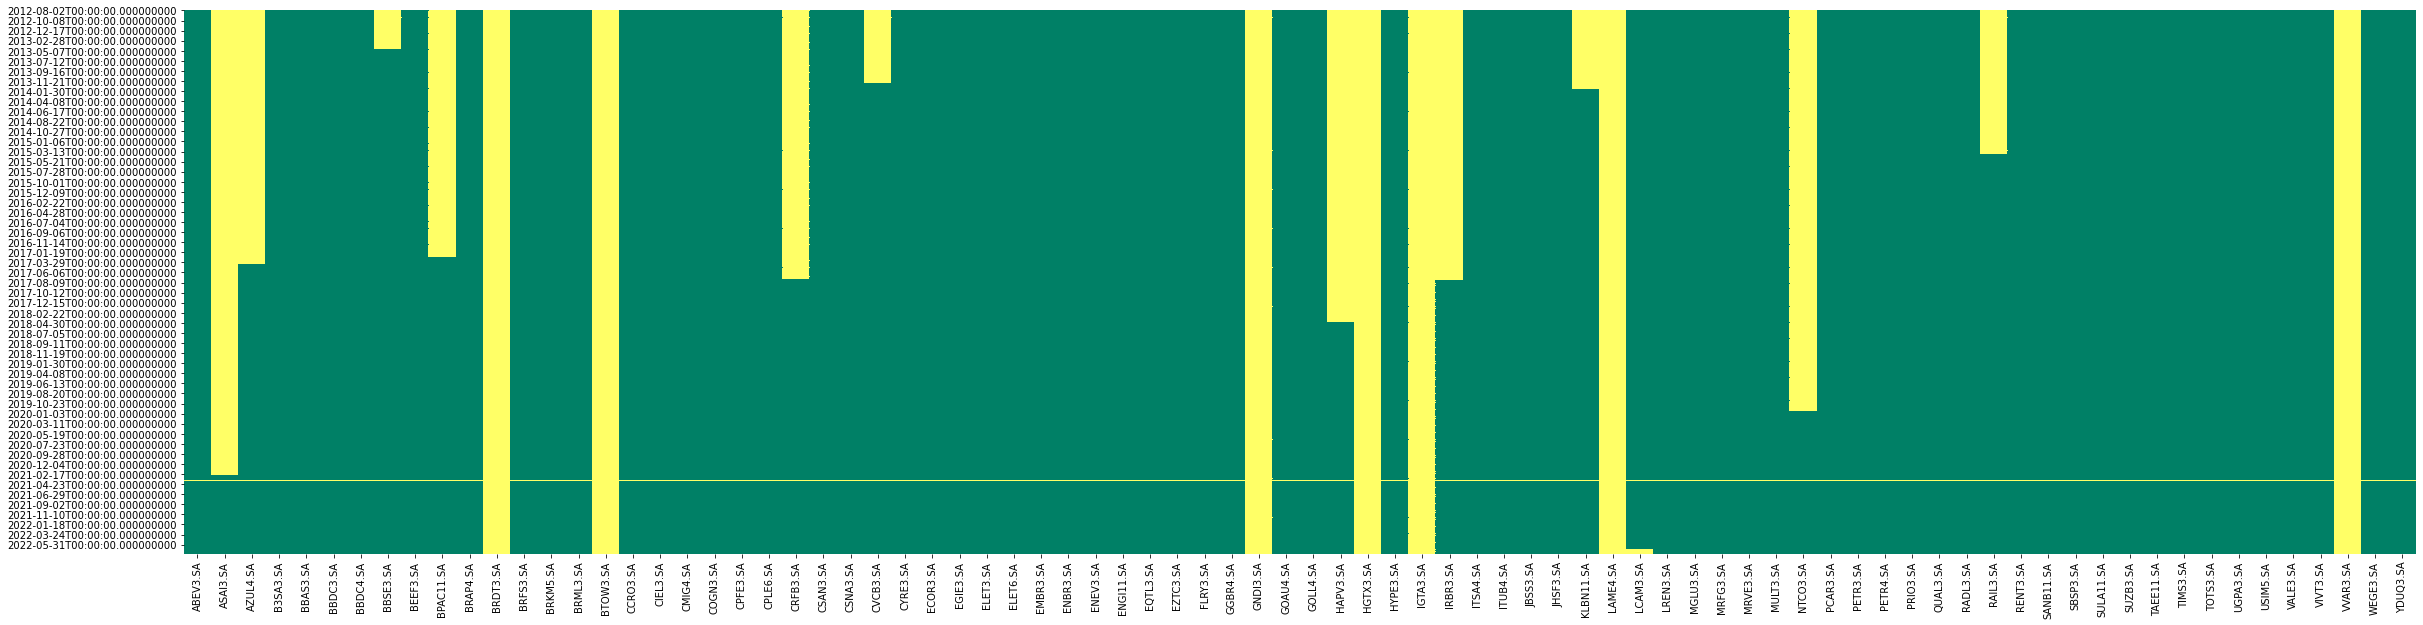

In [7]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

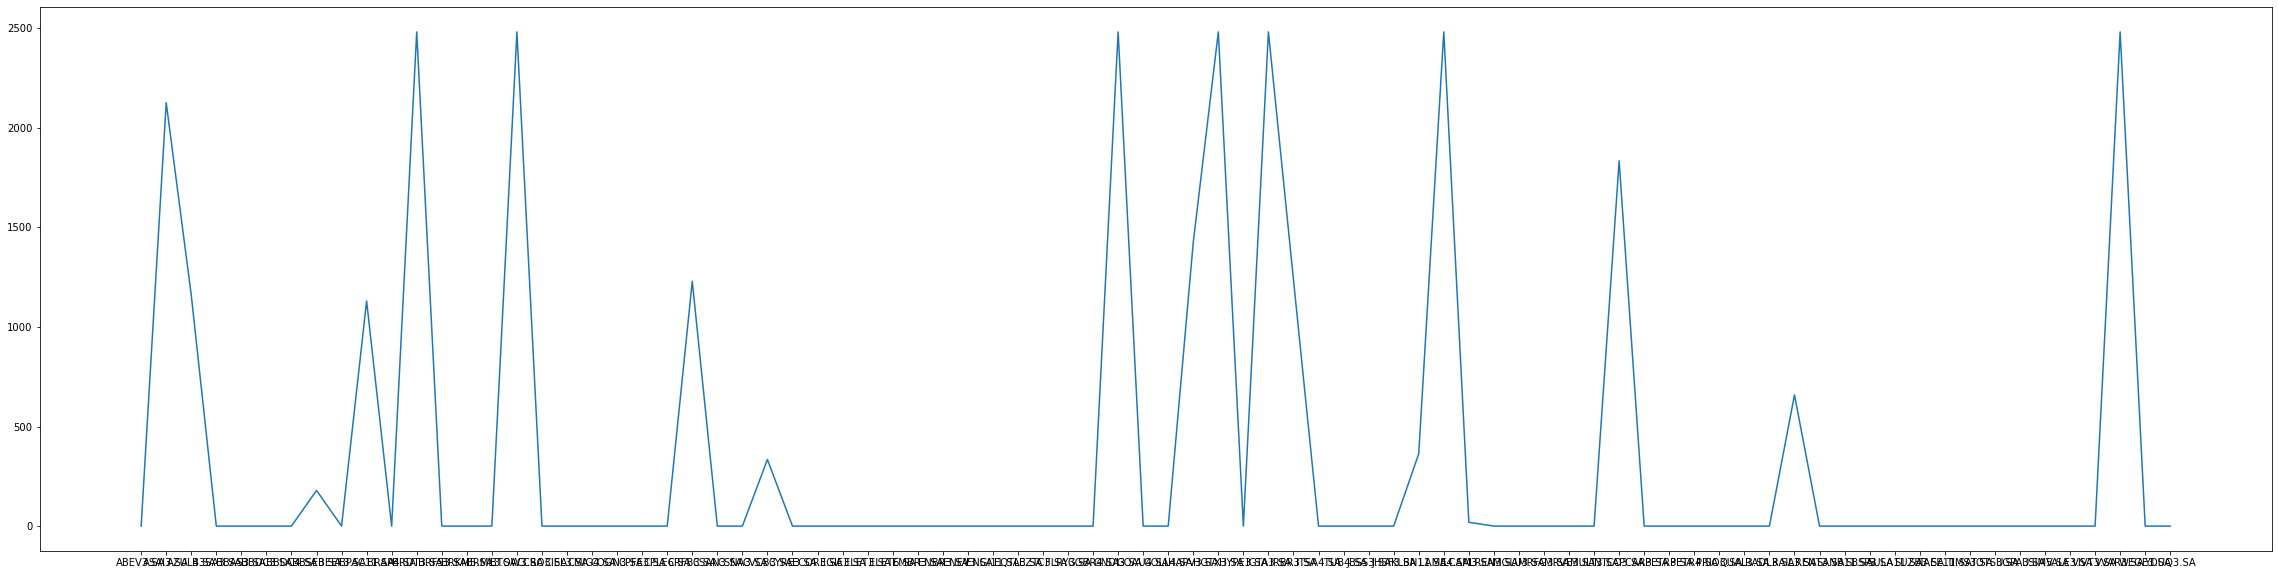

In [8]:
plt.figure(figsize=(40,10))
plt.plot(cols ,output.isnull().sum().values)

['Erros', 0, 'Ativos', 64]

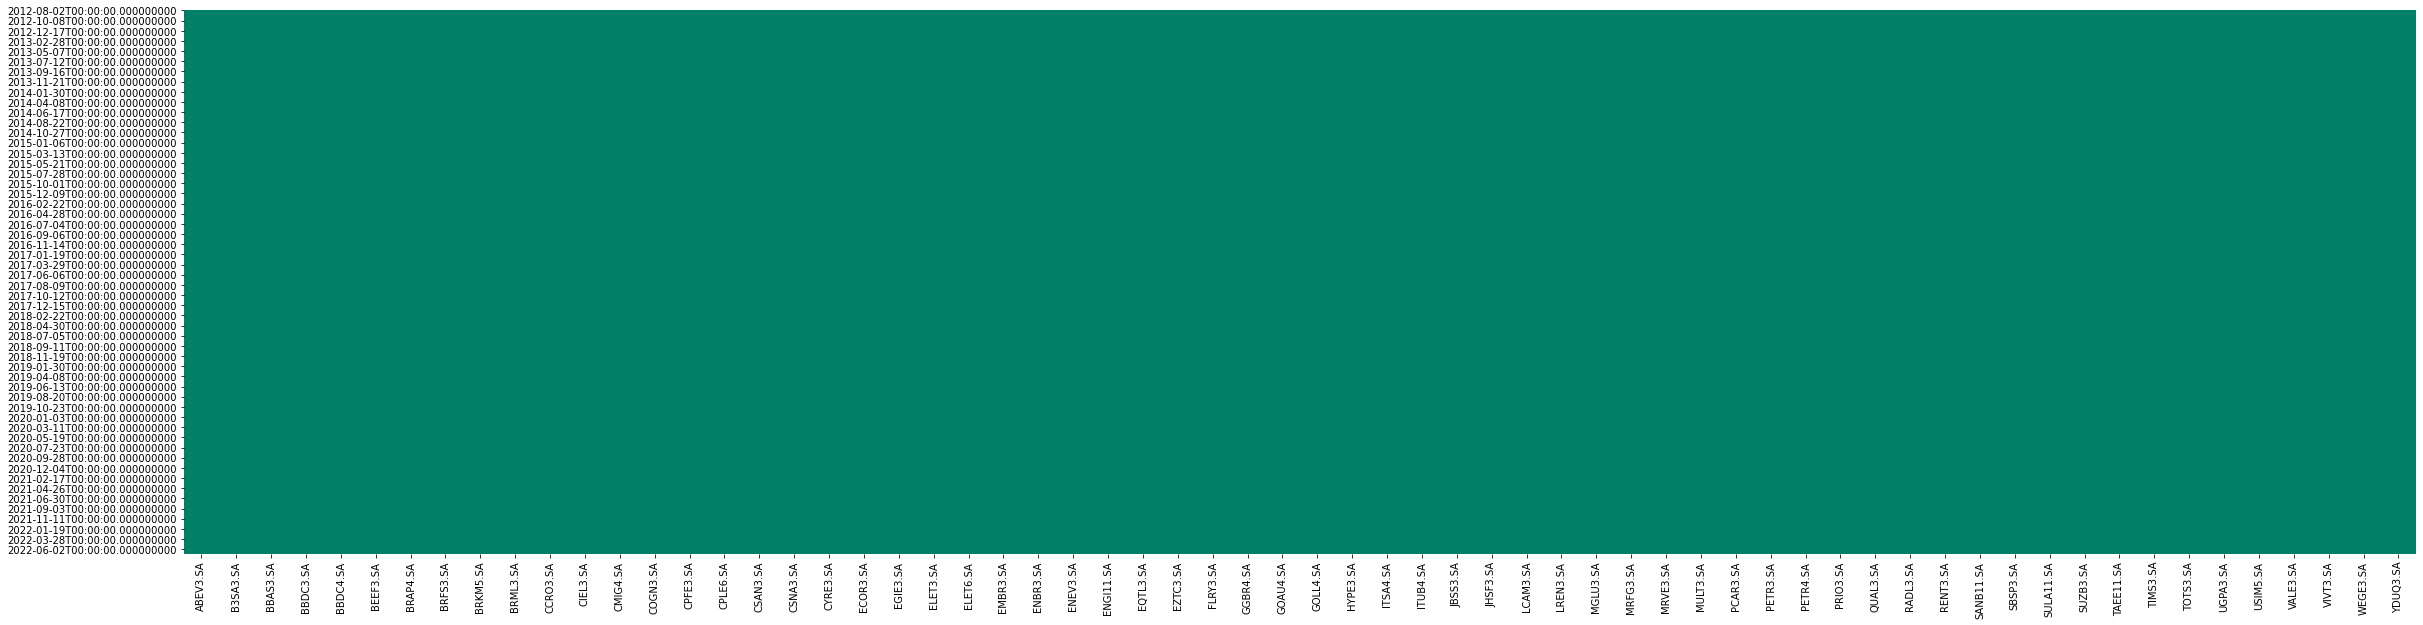

In [9]:
df = output.loc[:, output.isnull().sum()/output.count()*100 < 5]
df_droped = df.dropna(0)
plt.figure(figsize=(40,10))
sns.heatmap(df_droped.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(df_droped.isnull().sum()),"Ativos",len(df.columns)]

<AxesSubplot:>

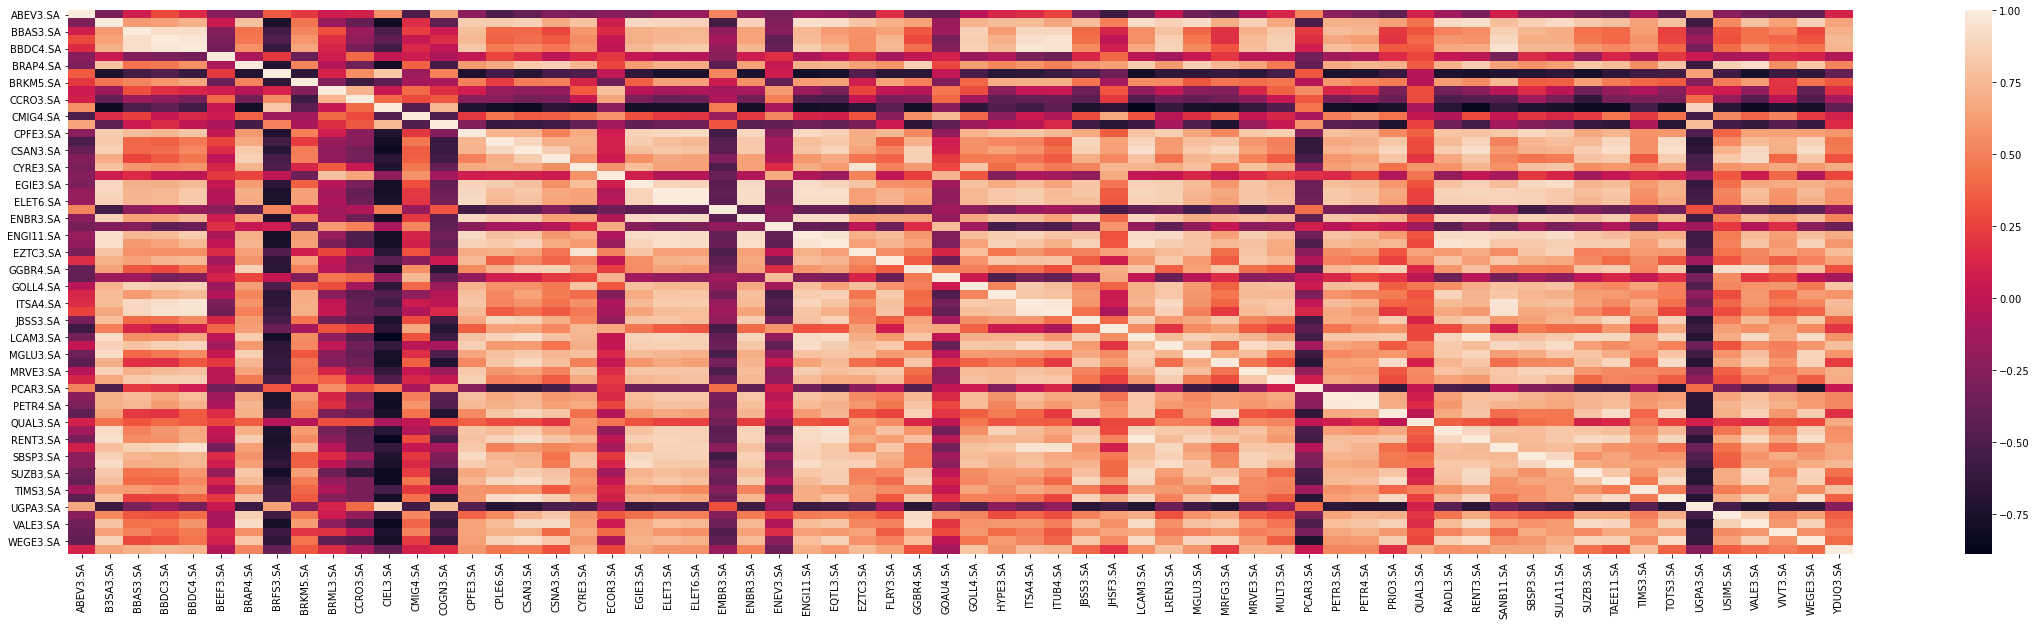

In [10]:
plt.figure(figsize=(40,10))
sns.heatmap(df_droped.corr())

In [15]:
df_droped.to_csv("InputsAtivosPreTratados.csv", header=False)

#### 1. Colete os preços e volumes de um conjunto de ativos durante o período de 10 (dez) anos, pertencentes a no mínimo 5 (cinco) Índices de Segmentos e Setoriais diferentes na B3, e separe os 30 (trinta) ativos mais líquidos;

In [ ]:
indexes = ['UTIL', 'ICON', 'SMLL', 'INDX', 'IBOV', 'IFNC']

data = []
for index in indexes:
    data.append(pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=' + index + '&idioma=pt-br'))
index_df = pd.DataFrame(data)
index_df

In [ ]:
todayB = dt.date.today()
yesterdayB = todayB - dt.timedelta(days=10*365)
print(todayB,yesterdayB)

In [ ]:
flag = 0
data = []
temp_selected = []
final_selected = []
for index in index_df[0]:
    for code in index['Código']:
        for x in final_selected:
            if (code == x[0]):
                flag = 1
                break
        if (flag):
            flag = 0
            continue
        temp_df = yf.download(code + '.SA', start=str(yesterdayB), end=str(todayB))
        if (not (isinstance((temp_df['Volume'].mean()), float))) or (math.isnan(temp_df['Volume'].mean())):
            continue
        if(len(temp_selected) == 0):
            temp_selected.append([code, temp_df])
        for pos in range(len(temp_selected)):
            if (temp_selected[pos][1]['Volume'].mean() < temp_df['Volume'].mean()):
                if (len(temp_selected) == 5):
                    temp_selected.pop()
                temp_selected.insert(pos, [code, temp_df])
                break
    final_selected.extend(temp_selected)
    temp_selected.clear()

#### 2. Construa amostras de treinamento e outras de teste, sendo a primeira com os 3 (três) anos e a segunda com o último ano, e desloque as janelas anualmente (walk forward analysis);

In [147]:
#walk forward analysis

output = final_selected

for tr,te in zip(treino[:7],teste[:7]):

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        


[2012, 2013, 2014] [2015]
[2013, 2014, 2015] [2016]
[2014, 2015, 2016] [2017]
[2015, 2016, 2017] [2018]
[2016, 2017, 2018] [2019]
[2017, 2018, 2019] [2020]
[2018, 2019, 2020] [2021]


#### 3. Na amostra de treinamento, aplique uma clusterização não supervisionada (K-Means ou DBSCAN) e separe um ativo para cada clusters, com o critério que desejar (sugestão maior índice Sharpe);

Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'RENT3.SA', 'LCAM3.SA', 'EQTL3.SA', 'PRIO3.SA']


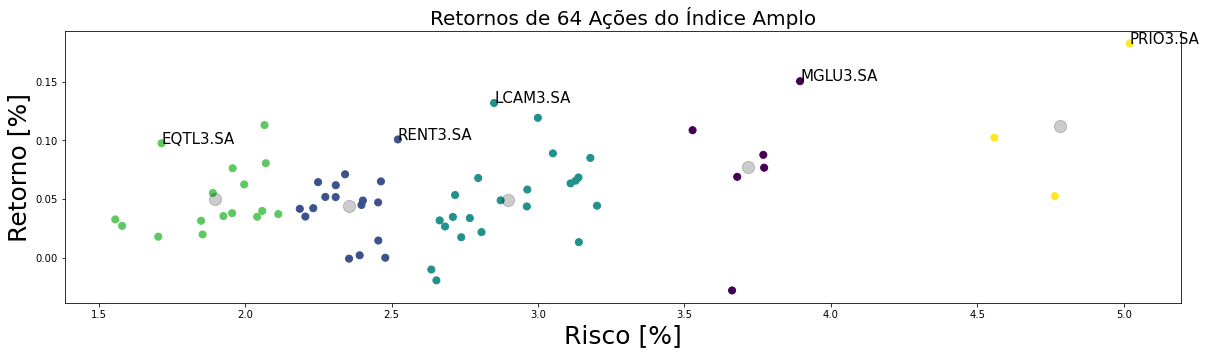

In [150]:
#declaração da função de KMeans para clasterização não supervisionada 
def SelecionaAtivos(df, N_Cluster):
    %matplotlib inline 
    from sklearn.cluster import KMeans
    output =df
    retornos=100*output.pct_change()
    stocks=retornos.columns

    X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])
    N=N_Cluster

    kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
    y_kmeans = kmeans.predict(X)

    fig = plt.subplots(figsize=(20,5))

    ax1=plt.subplot(1,1, 1) 
    ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    ax1.set_title('Retornos de '+str(len(stocks))+' Ações Selecionadas',fontsize=20)
    ax1.set_xlabel('Risco [%]',fontsize=25)
    ax1.set_ylabel('Retorno [%]',fontsize=25)

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

    best=[]
    for i in range(N):
        ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
        best.append(ind[ind==np.max(ind)])
    rb=list(pd.DataFrame(best).columns)
    print("Ativos com Melhor Relação em Cada Cluster:", rb)

    for r in rb:
        plt.text(X[stocks==r][0][0],X[stocks==r][0][1],r,fontsize=15)
    
    plt.show()
    return rb    
    
ListaAtivos = SelecionaAtivos(final_selected, 5)

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3.SA', 'YDUQ3.SA', 'COGN3.SA', 'JBSS3.SA']


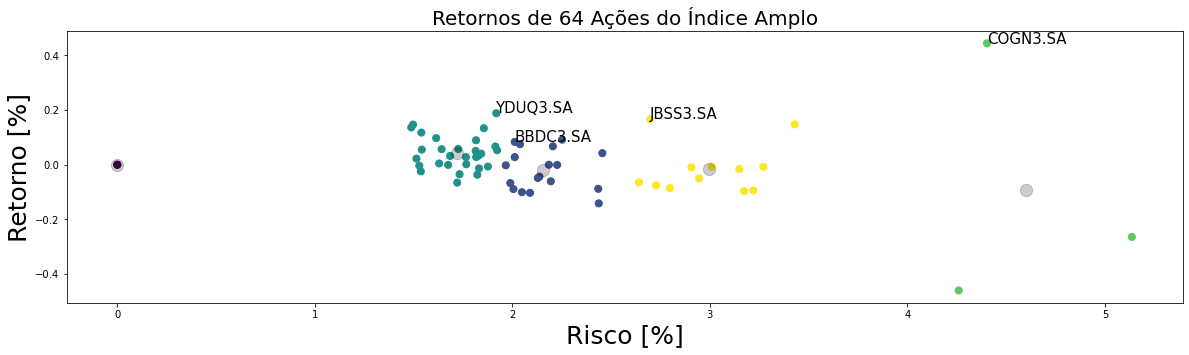

[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EMBR3.SA', 'BRKM5.SA', 'ELET3.SA', 'PRIO3.SA', 'PCAR3.SA']


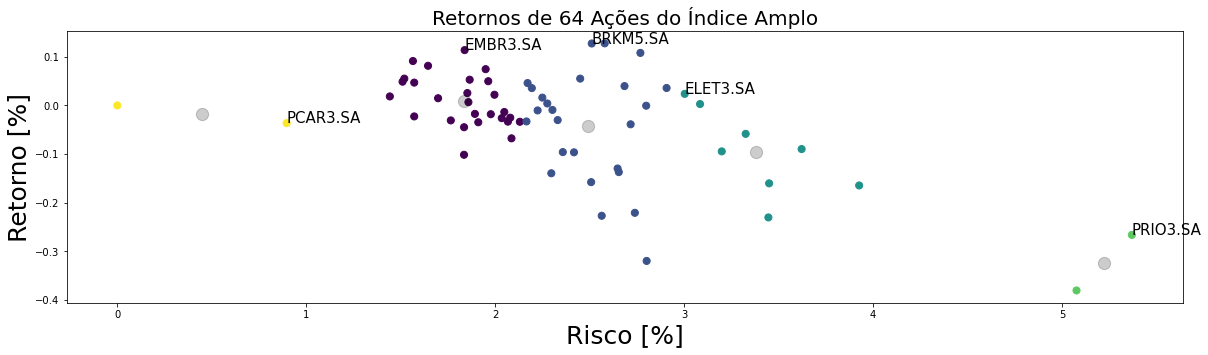

[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['RADL3.SA', 'PRIO3.SA', 'ELET3.SA', 'MGLU3.SA']


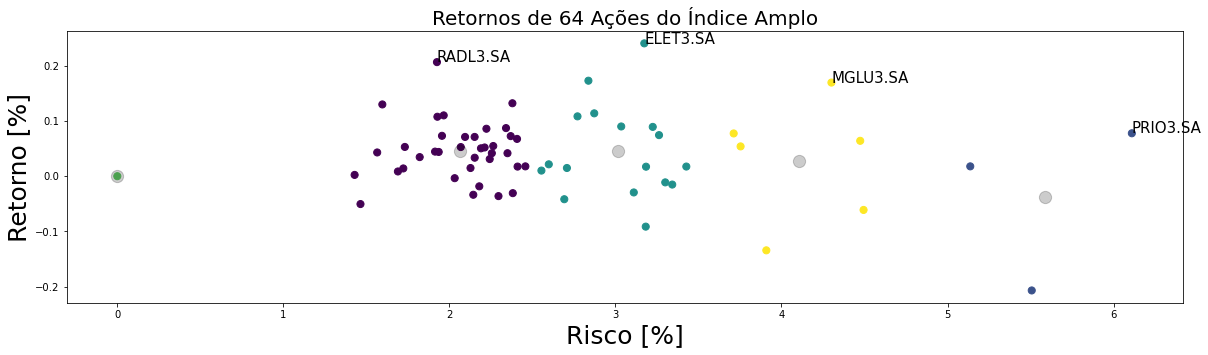

[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'RADL3.SA', 'EQTL3.SA', 'ELET3.SA', 'PRIO3.SA']


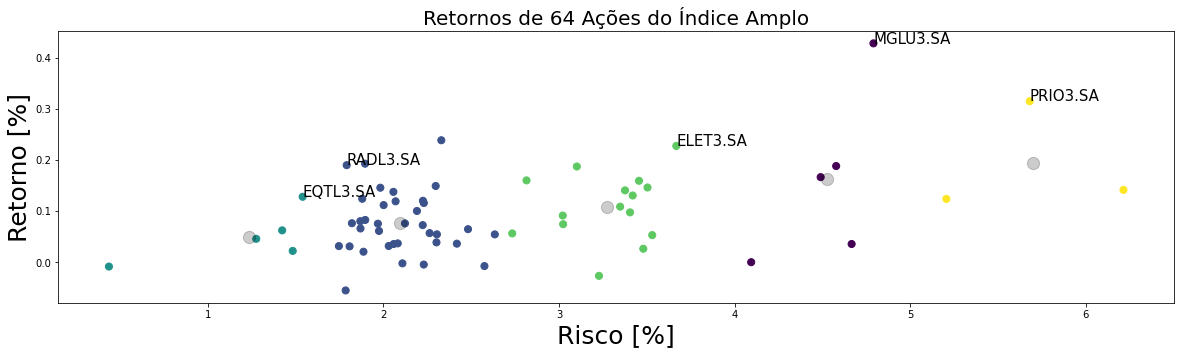

[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'LCAM3.SA', 'GOLL4.SA', 'ENGI11.SA', 'BRAP4.SA']


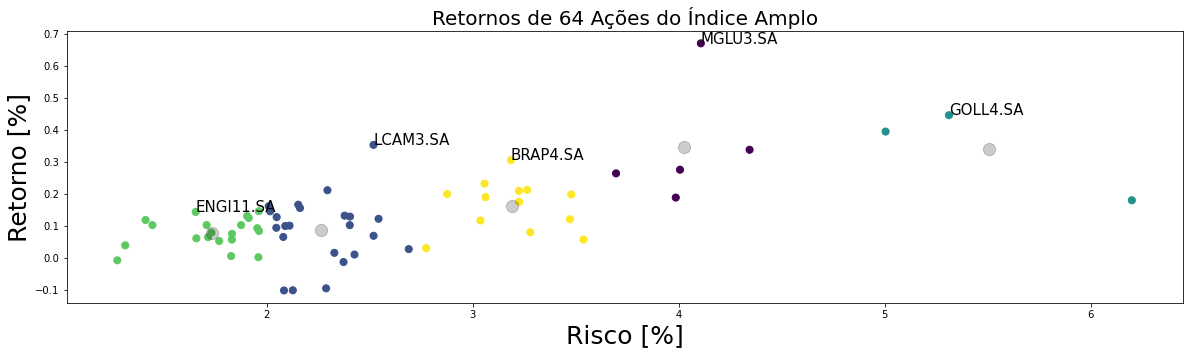

[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'SULA11.SA', 'PCAR3.SA', 'ENGI11.SA', 'LCAM3.SA']


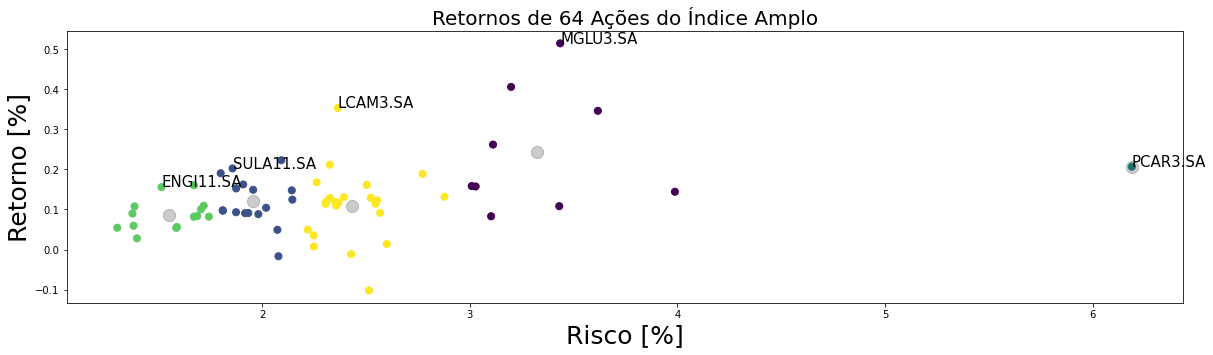

[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['PRIO3.SA', 'WEGE3.SA', 'MGLU3.SA', 'ENEV3.SA', 'LCAM3.SA']


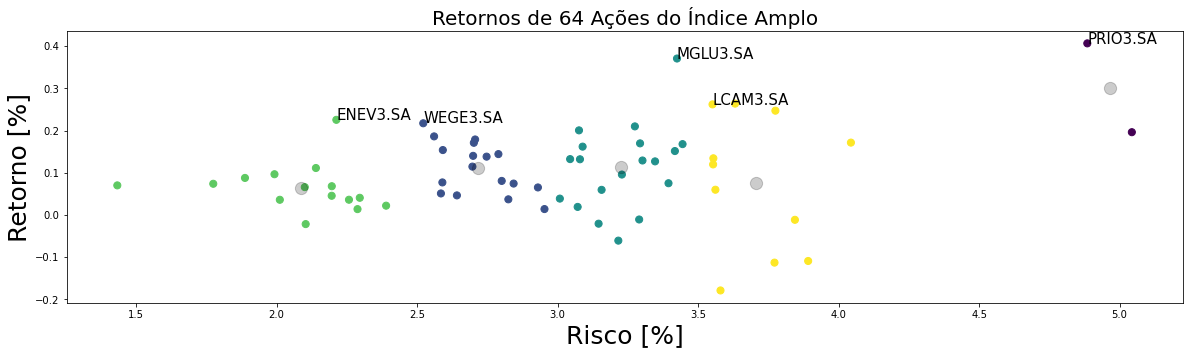

In [151]:
# Configuração de parametros

output =final_selected 

for tr,te in zip(treino[:7],teste[:7]):

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    
    
    

In [ ]:
# Configuração de parametros

output =final_selected 

for tr,te in zip(treino[:7],teste[:7]):

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    #exclui os outliers em risco e retorno
    
    
    

#### 4 . Aplique a Teoria do Portfolio Moderno de Markowitz nos ativos escolhidos no passo anterior, no sentido de alocar um capital de 100.000,00 reais;

In [153]:
#Declaração da função de Markovitz com base na maior relação de Sharpe
def TPM_Maior_Sharpe(ret,N):
    C=ret.cov()
    MU=ret.mean()
    ONE=np.ones(len(ret.columns))
    rf=0.2
    temp=np.dot(np.linalg.inv(C),pd.DataFrame(MU-np.dot(ONE,rf)))
    qm=temp/temp.sum()
    mu_m=np.dot(qm.transpose(),MU)
    sigma_m=(np.dot(np.dot(pd.DataFrame(qm).transpose(),C),pd.DataFrame(qm)))**0.5
    return qm,mu_m,sigma_m

qm,mu_m,sigma_m = TPM_Maior_Sharpe(df[ListaAtivos].dropna(),1000)

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3.SA', 'YDUQ3.SA', 'COGN3.SA', 'JBSS3.SA']


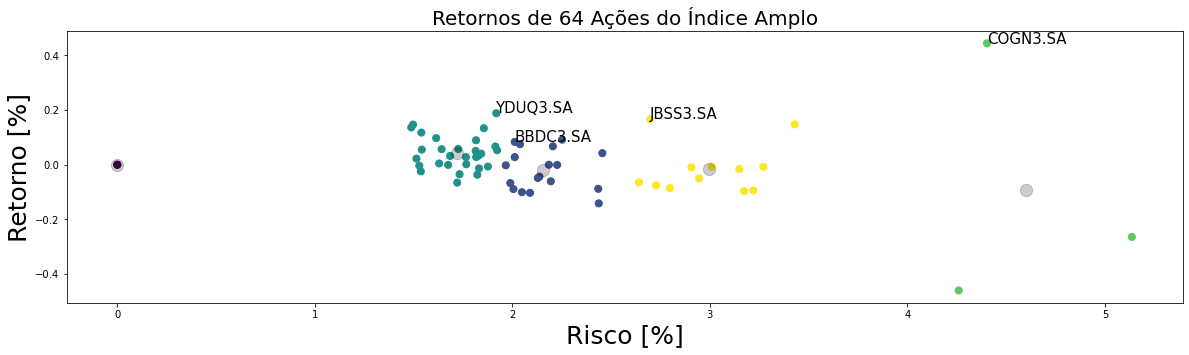

Coeficiente de alocação de capital (q)
[[ 0.71091575]
 [ 0.66745221]
 [-1.2086639 ]
 [ 0.83029593]]
[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EMBR3.SA', 'BRKM5.SA', 'ELET3.SA', 'PRIO3.SA', 'PCAR3.SA']


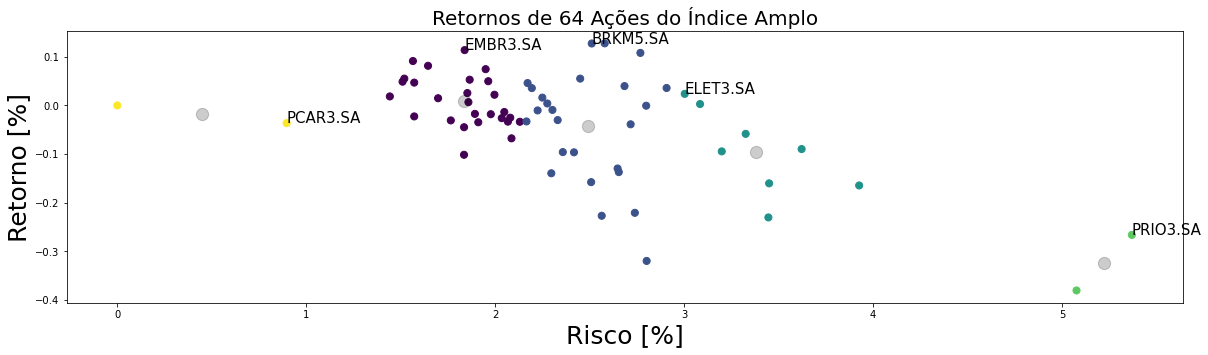

Coeficiente de alocação de capital (q)
[[0.2181068 ]
 [0.15062405]
 [0.16063022]
 [0.31853688]
 [0.15210205]]
[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['RADL3.SA', 'PRIO3.SA', 'ELET3.SA', 'MGLU3.SA']


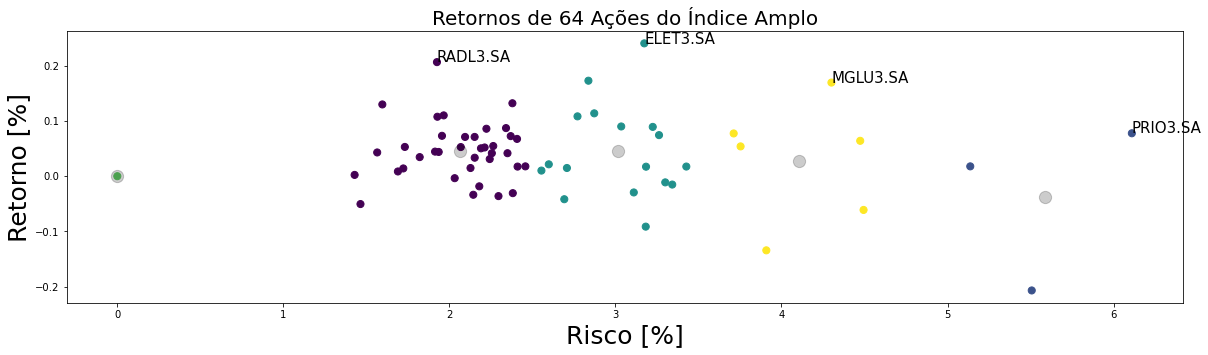

Coeficiente de alocação de capital (q)
[[-0.07952262]
 [-0.97987441]
 [-0.01005702]
 [ 2.06945405]]
[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'RADL3.SA', 'EQTL3.SA', 'ELET3.SA', 'PRIO3.SA']


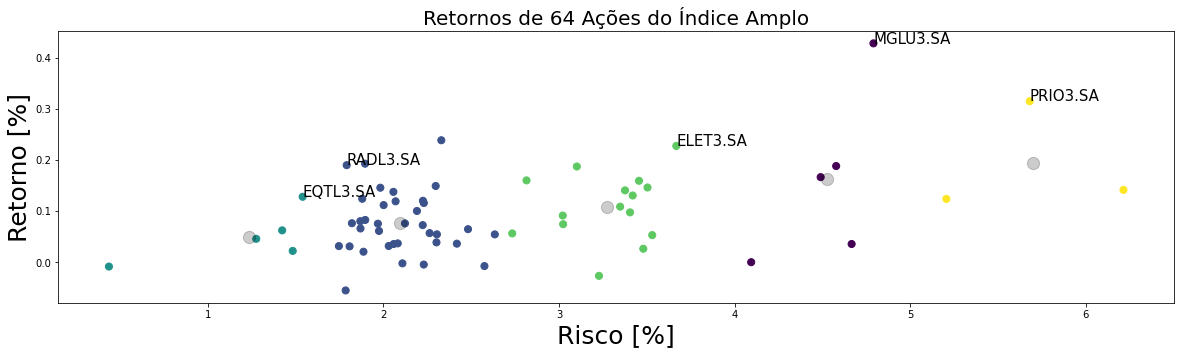

Coeficiente de alocação de capital (q)
[[ 4.10357377]
 [ 0.90506786]
 [-4.2063564 ]
 [ 0.58371808]
 [-0.3860033 ]]
[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'LCAM3.SA', 'GOLL4.SA', 'ENGI11.SA', 'BRAP4.SA']


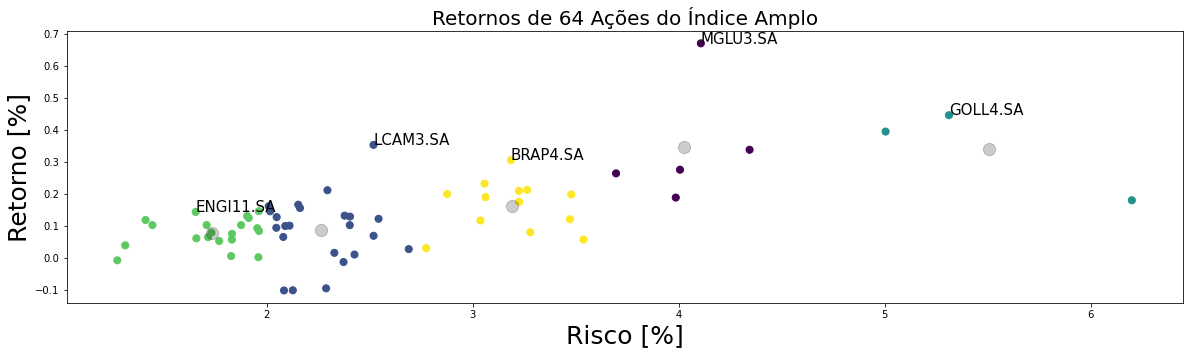

Coeficiente de alocação de capital (q)
[[ 1.22602931]
 [ 0.23587453]
 [ 0.43406607]
 [-1.03556481]
 [ 0.13959489]]
[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'SULA11.SA', 'PCAR3.SA', 'ENGI11.SA', 'LCAM3.SA']


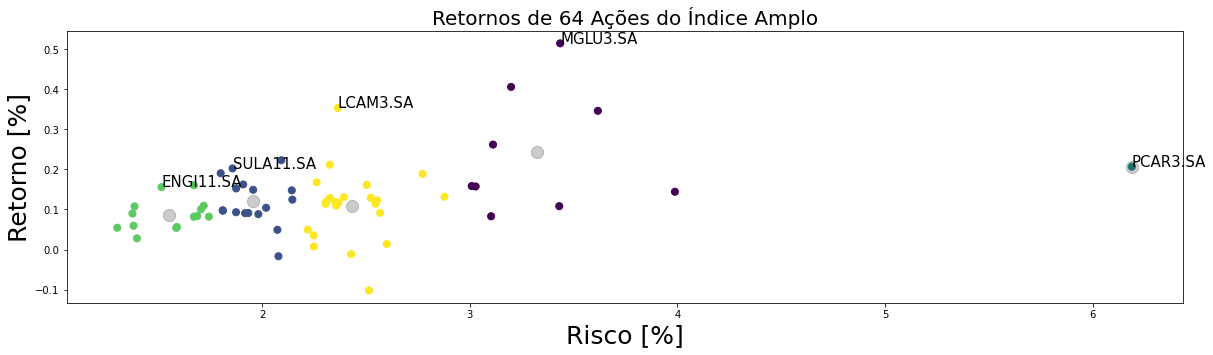

Coeficiente de alocação de capital (q)
[[ 0.4289975 ]
 [-0.03647241]
 [-0.14073954]
 [-1.23789284]
 [ 1.9861073 ]]
[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['PRIO3.SA', 'WEGE3.SA', 'MGLU3.SA', 'ENEV3.SA', 'LCAM3.SA']


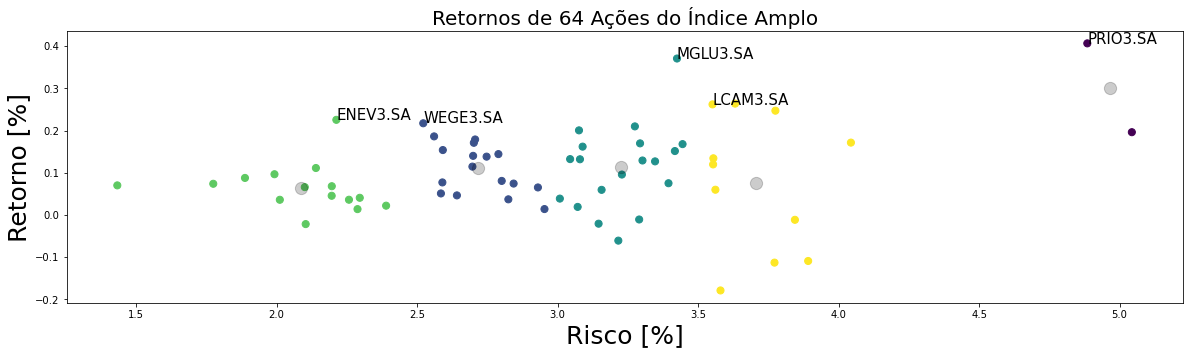

Coeficiente de alocação de capital (q)
[[ 7.70651303]
 [-4.65607007]
 [10.06057509]
 [-6.37166886]
 [-5.73934919]]


,CICLO,ANOS_TREINO,ANOS_TESTE,ATIVO,PESOS,OPERAÇÃO,POSICAO_1D_TREINO,POSICAO_UD_TREINO,RESULTADO_TREINO,POSICAO_1D_TESTE,POSICAO_UD_TESTE,RESULTADO_TESTE
0,1,"[2012, 2013, 2014]",[2015],BBDC3.SA,0.710916,compra,7.109157e+04,1.036235e+05,3.253195e+04,1.032310e+05,7.465471e+04,-2.857630e+04
1,1,"[2012, 2013, 2014]",[2015],YDUQ3.SA,0.667452,compra,6.674522e+04,1.831728e+05,1.164276e+05,1.717975e+05,1.086882e+05,-6.310930e+04
2,1,"[2012, 2013, 2014]",[2015],COGN3.SA,-1.208664,venda,-1.208664e+05,-1.056717e+06,9.358506e+05,-1.022184e+06,-6.582034e+05,-3.639803e+05
3,1,"[2012, 2013, 2014]",[2015],JBSS3.SA,0.830296,compra,8.302959e+04,1.797631e+05,9.673350e+04,1.700897e+05,1.991098e+05,2.902005e+04
4,2,"[2013, 2014, 2015]",[2016],EMBR3.SA,0.218107,compra,2.181068e+04,4.470227e+04,2.289159e+04,4.341406e+04,2.369117e+04,-1.972290e+04
5,2,"[2013, 2014, 2015]",[2016],BRKM5.SA,0.150624,compra,1.506241e+04,3.054505e+04,1.548265e+04,2.996998e+04,3.787719e+04,7.907209e+03
6,2,"[2013, 2014, 2015]",[2016],ELET3.SA,0.160630,compra,1.606302e+04,1.374785e+04,-2.315175e+03,1.296021e+04,5.444243e+04,4.148222e+04
7,2,"[2013, 2014, 2015]",[2016],PRIO3.SA,0.318537,compra,3.185369e+04,1.563959e+03,-3.028973e+04,1.468206e+03,2.780655e+03,1.312449e+03
8,2,"[2013, 2014, 2015]",[2016],PCAR3.SA,0.152102,compra,1.521020e+04,1.121649e+04,-3.993718e+03,1.121649e+04,9.535027e+03,-1.681459e+03
9,3,"[2014, 2015, 2016]",[2017],RADL3.SA,-0.079523,venda,-7.952262e+03,-3.211874e+04,2.416648e+04,-3.182480e+04,-4.818599e+04,1.636119e+04


In [160]:
# Configuração de parametrso
capital=100000
output =final_selected

_CICLO =[]
_ATIVO=[]
_PESOS=[]
_OPERACAO=[]
_POSICAO_1D_TREINO=[]
_POSICAO_UD_TREINO=[]
_RESULTADO_TREINO=[]
_POSICAO_1D_TESTE=[]
_POSICAO_UD_TESTE=[]
_RESULTADO_TESTE=[]
_ANOS_TREINO=[]
_ANOS_TESTE=[]

Performance_Df = pd.DataFrame(columns=[
    'CICLO',
    'ANOS_TREINO',
    'ANOS_TESTE',
    'ATIVO',
    'PESOS',
    'OPERAÇÃO',
    'POSICAO_1D_TREINO',
    'POSICAO_UD_TREINO',
    'RESULTADO_TREINO',
    'POSICAO_1D_TESTE',
    'POSICAO_UD_TESTE',
    'RESULTADO_TESTE'
])

operacao=""
ciclo_flag=0
for tr,te in zip(treino[:7],teste[:7]):
    ciclo_flag = ciclo_flag +1

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    
    #seleciona os registros dos ativos retornados pelo kmeans
    df_carteira_treino = tr_aux[ListaAtivos]
    df_carteira_teste = te_aux[ListaAtivos]
    
    #calcula os pesos de markovitz
    qm,mu_m,sigma_m = TPM_Maior_Sharpe(df_carteira_treino.dropna(),1000)
    
    # Calcular montante para comprar ou vendar
    pesos=qm
    
    print("Coeficiente de alocação de capital (q)")
    print(pesos)

    st_in =[]
    for i in range(len(ListaAtivos)):
        st_in.append(pesos[i]*capital/df_carteira_treino[df_carteira_treino.columns[i]].iloc[0])
        _PESOS.append(pesos[i][0])
        
    
    for n in range(len(ListaAtivos)):
        _CICLO.append(ciclo_flag)
        _ANOS_TREINO.append(str(anosTreino))
        _ANOS_TESTE.append(str(anosTeste))
        _ATIVO.append(ListaAtivos[n])
        
        # entrar comprado
        if st_in[n][0] >= 0:
            operacao = "compra"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_Ud_in_sample - posicao_1d_in_sample

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_Ud_teste - posicao_1d_teste


        # entra vendido
        else: 
            operacao ="venda"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_1d_in_sample - posicao_Ud_in_sample 

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_1d_teste - posicao_Ud_teste
                
        _OPERACAO.append(operacao)
        _POSICAO_1D_TREINO.append(posicao_1d_in_sample)
        _POSICAO_UD_TREINO.append(posicao_Ud_in_sample)
        _RESULTADO_TREINO.append(resultado)
        _POSICAO_1D_TESTE.append(posicao_1d_teste)
        _POSICAO_UD_TESTE.append(posicao_Ud_teste)
        _RESULTADO_TESTE.append(resultado_teste)
        
        
Performance_Df["CICLO"]=_CICLO
Performance_Df["ANOS_TREINO"]=_ANOS_TREINO
Performance_Df["ANOS_TESTE"]=_ANOS_TESTE
Performance_Df["CICLO"]=_CICLO
Performance_Df["ATIVO"]=_ATIVO
Performance_Df["PESOS"]=_PESOS
Performance_Df["OPERAÇÃO"]=_OPERACAO
Performance_Df["POSICAO_1D_TREINO"]=_POSICAO_1D_TREINO
Performance_Df["POSICAO_UD_TREINO"]=_POSICAO_UD_TREINO
Performance_Df["RESULTADO_TREINO"]=_RESULTADO_TREINO
Performance_Df["POSICAO_1D_TESTE"]=_POSICAO_1D_TESTE
Performance_Df["POSICAO_UD_TESTE"]=_POSICAO_UD_TESTE
Performance_Df["RESULTADO_TESTE"]=_RESULTADO_TESTE
        
Performance_Df

In [161]:
Performance_Df.to_csv("Carteira.csv", header=False)

#### 5. Verifique o resultado da alocação de capital com Markowitz nos ativos separados, na fase de treinamento, na amostra de teste que representa o último ano da aquisição e compare com o índice Bovespa;

[2012, 2013, 2014] [2015]
Ativos com Melhor Relação em Cada Cluster: ['BBDC3.SA', 'YDUQ3.SA', 'COGN3.SA', 'JBSS3.SA']


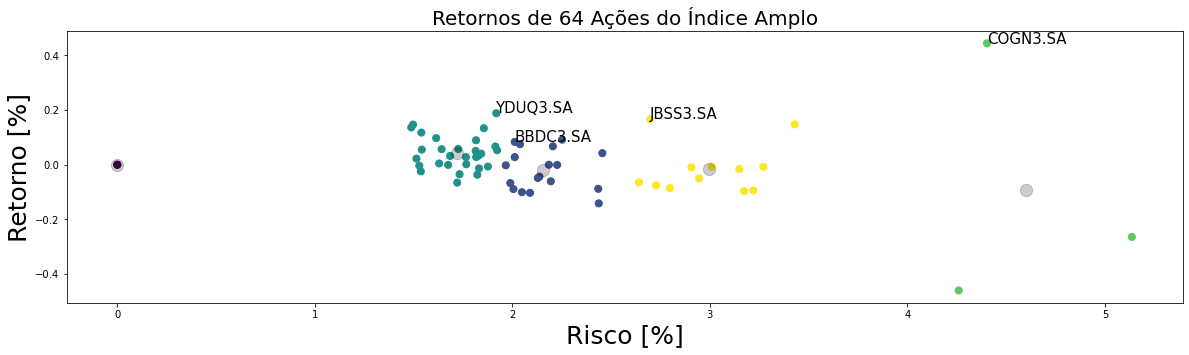

[[ 0.71091575]
 [ 0.66745221]
 [-1.2086639 ]
 [ 0.83029593]]


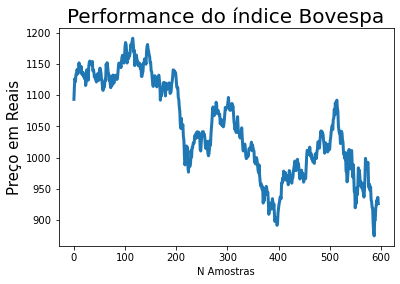

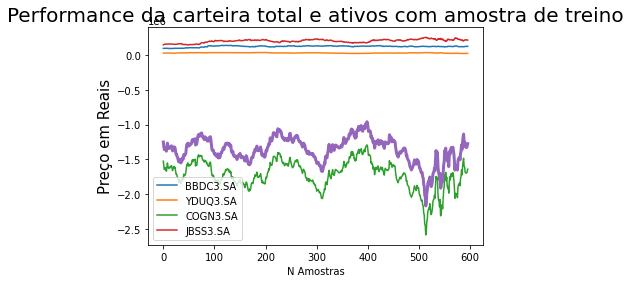

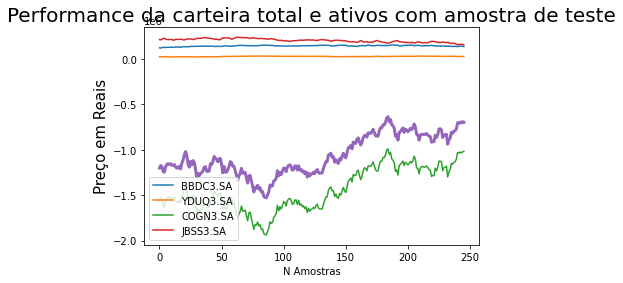

[2013, 2014, 2015] [2016]
Ativos com Melhor Relação em Cada Cluster: ['EMBR3.SA', 'BRKM5.SA', 'ELET3.SA', 'PRIO3.SA', 'PCAR3.SA']


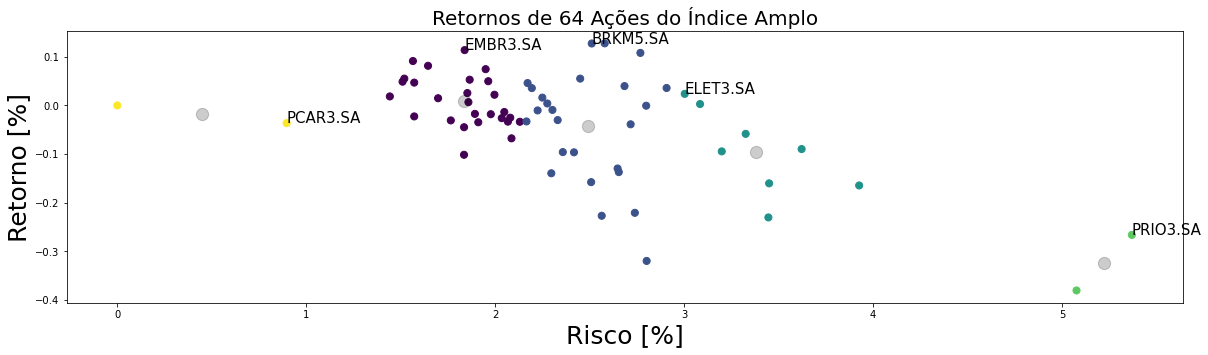

[[0.2181068 ]
 [0.15062405]
 [0.16063022]
 [0.31853688]
 [0.15210205]]


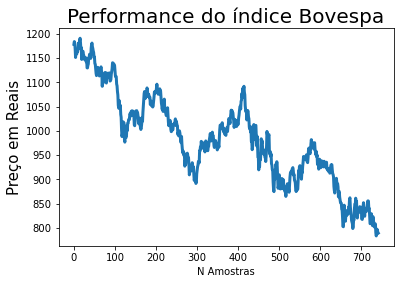

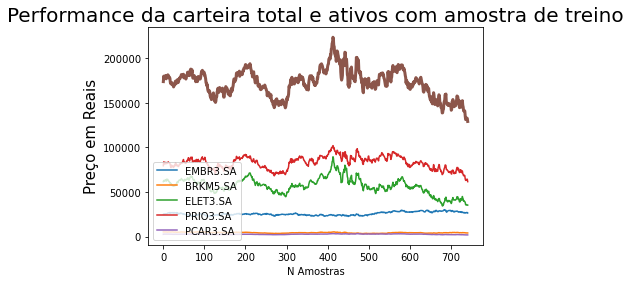

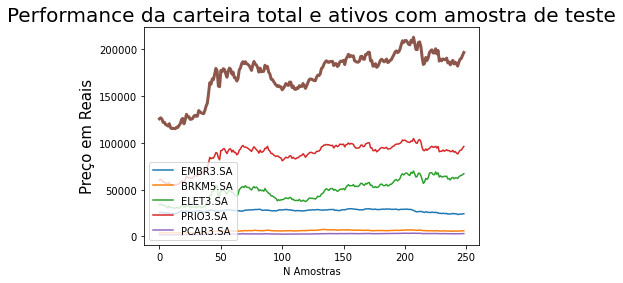

[2014, 2015, 2016] [2017]
Ativos com Melhor Relação em Cada Cluster: ['RADL3.SA', 'PRIO3.SA', 'ELET3.SA', 'MGLU3.SA']


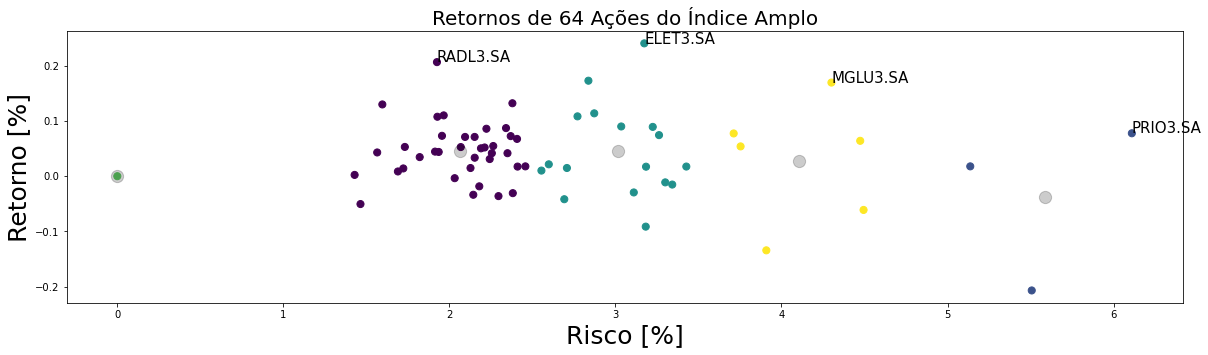

[[-0.07952262]
 [-0.97987441]
 [-0.01005702]
 [ 2.06945405]]


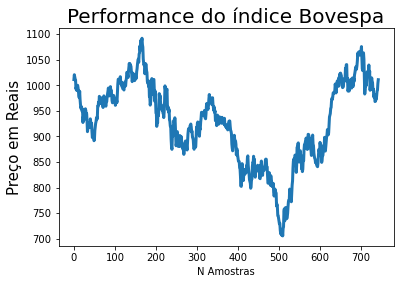

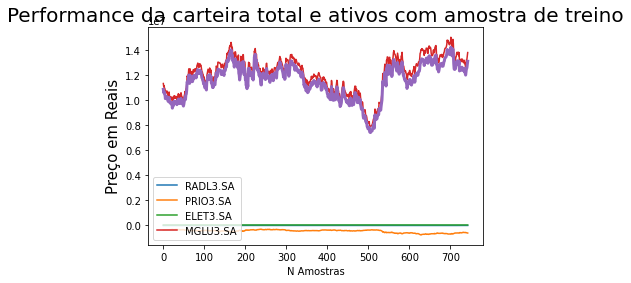

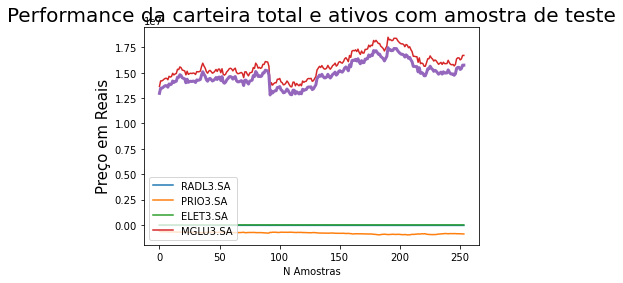

[2015, 2016, 2017] [2018]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'RADL3.SA', 'EQTL3.SA', 'ELET3.SA', 'PRIO3.SA']


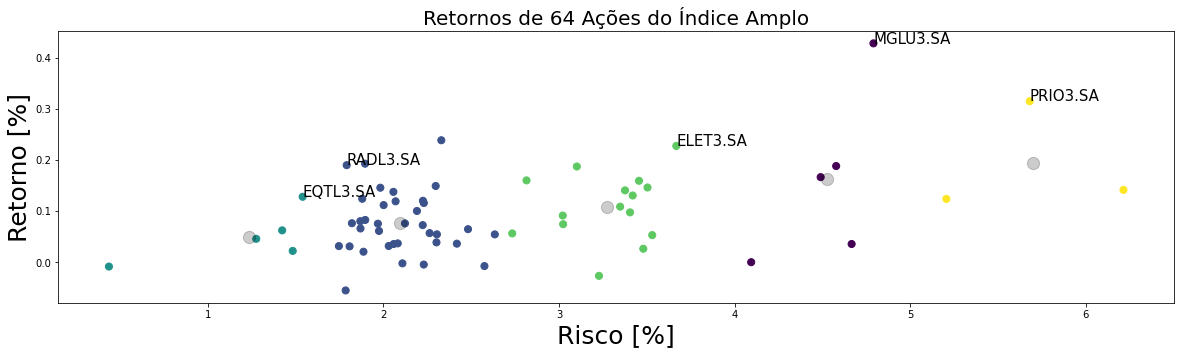

[[ 4.10357377]
 [ 0.90506786]
 [-4.2063564 ]
 [ 0.58371808]
 [-0.3860033 ]]


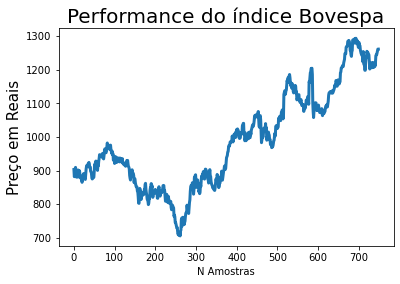

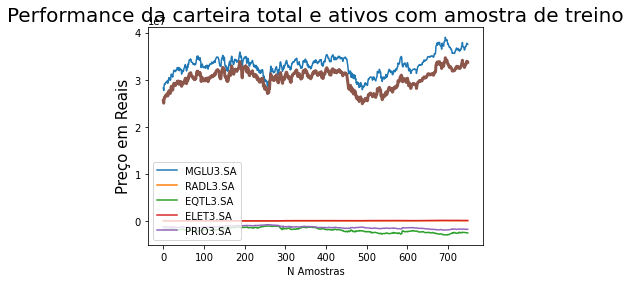

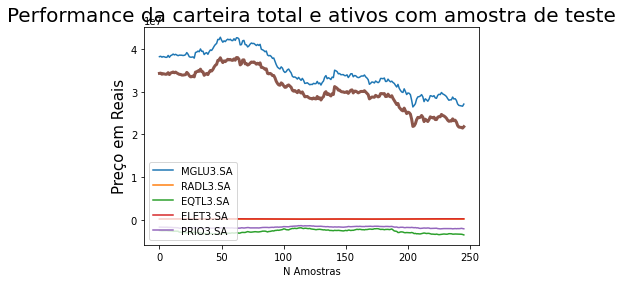

[2016, 2017, 2018] [2019]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'LCAM3.SA', 'GOLL4.SA', 'ENGI11.SA', 'BRAP4.SA']


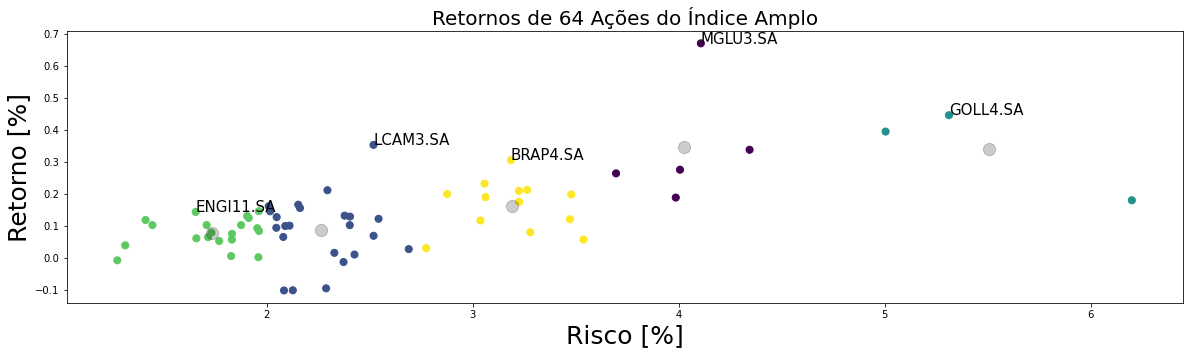

[[ 1.22602931]
 [ 0.23587453]
 [ 0.43406607]
 [-1.03556481]
 [ 0.13959489]]


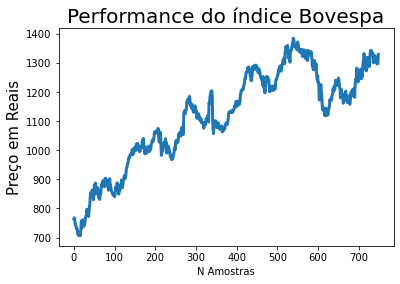

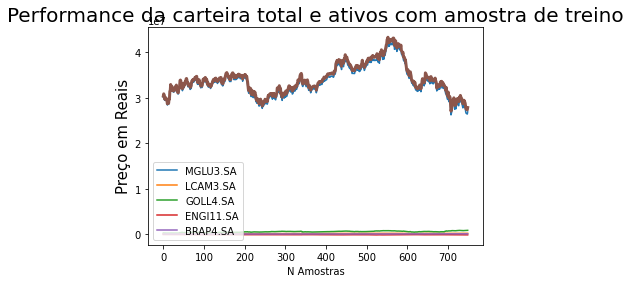

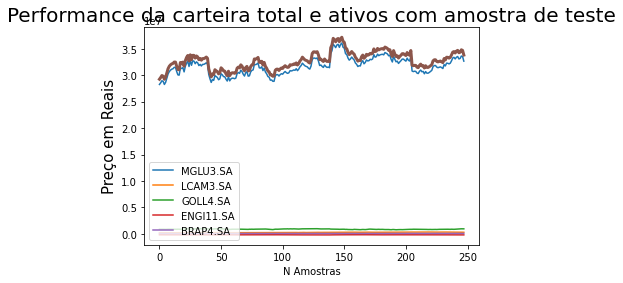

[2017, 2018, 2019] [2020]
Ativos com Melhor Relação em Cada Cluster: ['MGLU3.SA', 'SULA11.SA', 'PCAR3.SA', 'ENGI11.SA', 'LCAM3.SA']


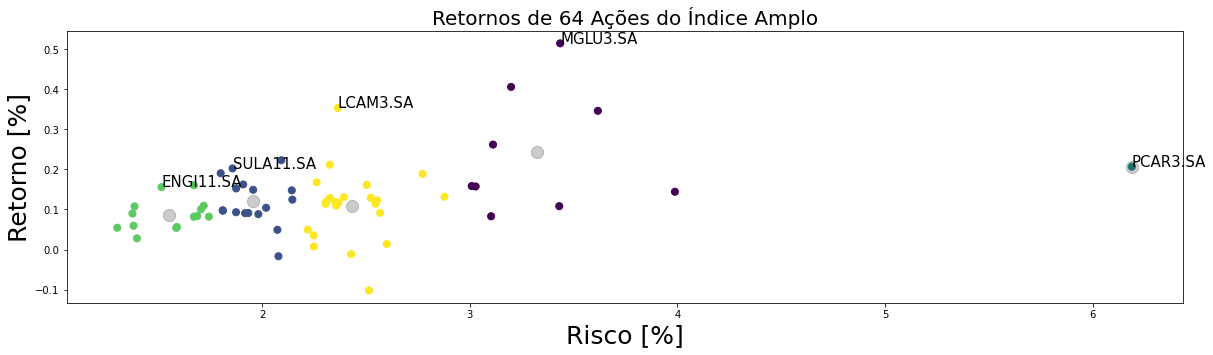

[[ 0.4289975 ]
 [-0.03647241]
 [-0.14073954]
 [-1.23789284]
 [ 1.9861073 ]]


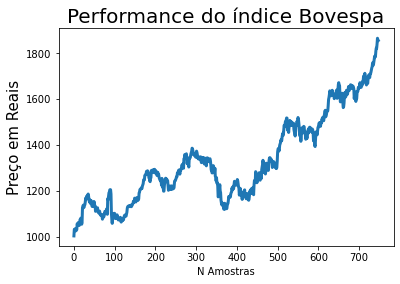

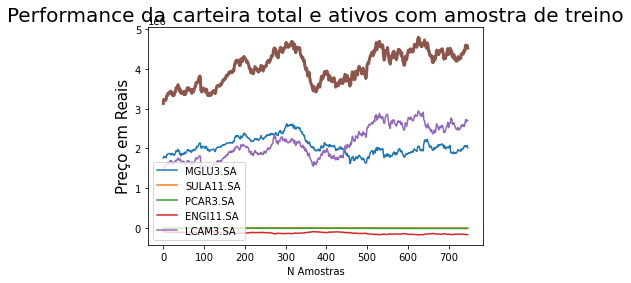

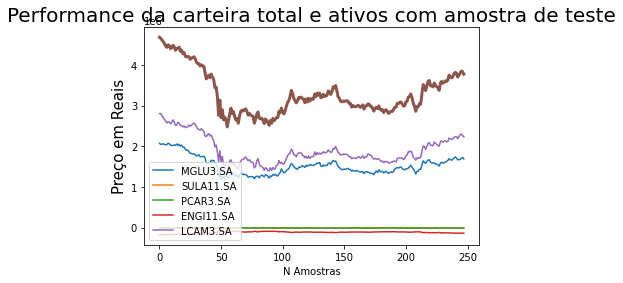

[2018, 2019, 2020] [2021]
Ativos com Melhor Relação em Cada Cluster: ['PRIO3.SA', 'WEGE3.SA', 'MGLU3.SA', 'ENEV3.SA', 'LCAM3.SA']


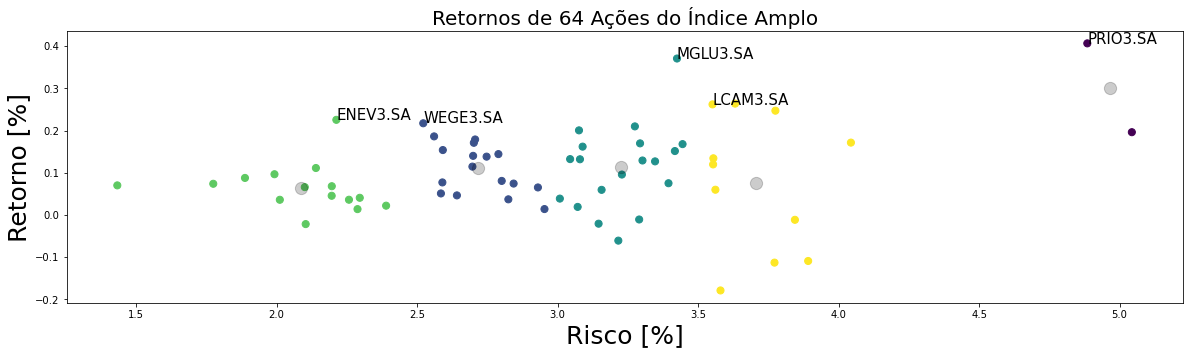

[[ 7.70651303]
 [-4.65607007]
 [10.06057509]
 [-6.37166886]
 [-5.73934919]]


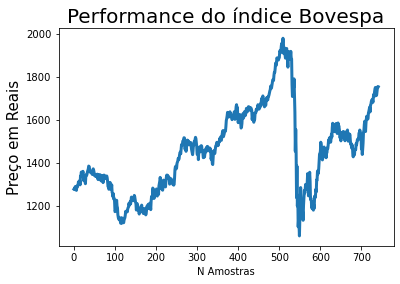

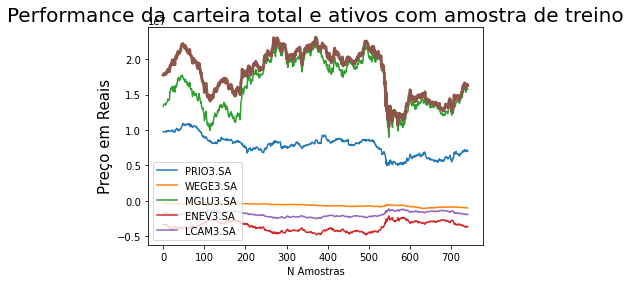

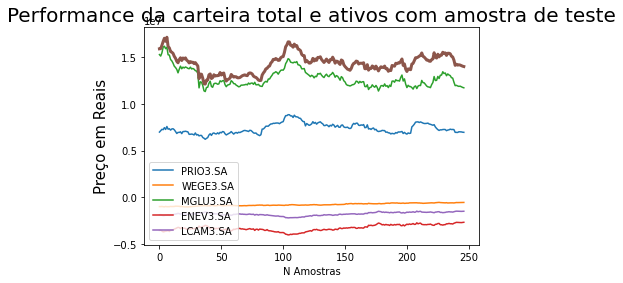

,CICLO,ANOS_TREINO,ANOS_TESTE,ATIVO,PESOS,OPERAÇÃO,POSICAO_1D_TREINO,POSICAO_UD_TREINO,RESULTADO_TREINO,POSICAO_1D_TESTE,POSICAO_UD_TESTE,RESULTADO_TESTE,IBOVESPA_1D_TREINO,IBOVESPA_UD_TREINO,IBOVESPA_RESULTADO_TREINO,IBOVESPA_1D_TESTE,IBOVESPA_UD_TESTE,IBOVESPA_RESULTADO_TESTE
0,1,"[2012, 2013, 2014]",[2015],BBDC3.SA,0.710916,compra,7.109157e+04,1.036235e+05,3.253195e+04,1.032310e+05,7.465471e+04,-2.857630e+04,1.036235e+05,1.036235e+05,1.036235e+05,1.036235e+05,1.036235e+05,1.036235e+05
1,1,"[2012, 2013, 2014]",[2015],YDUQ3.SA,0.667452,compra,6.674522e+04,1.831728e+05,1.164276e+05,1.717975e+05,1.086882e+05,-6.310930e+04,1.831728e+05,1.831728e+05,1.831728e+05,1.831728e+05,1.831728e+05,1.831728e+05
2,1,"[2012, 2013, 2014]",[2015],COGN3.SA,-1.208664,venda,-1.208664e+05,-1.056717e+06,9.358506e+05,-1.022184e+06,-6.582034e+05,-3.639803e+05,-1.056717e+06,-1.056717e+06,-1.056717e+06,-1.056717e+06,-1.056717e+06,-1.056717e+06
3,1,"[2012, 2013, 2014]",[2015],JBSS3.SA,0.830296,compra,8.302959e+04,1.797631e+05,9.673350e+04,1.700897e+05,1.991098e+05,2.902005e+04,1.797631e+05,1.797631e+05,1.797631e+05,1.797631e+05,1.797631e+05,1.797631e+05
4,2,"[2013, 2014, 2015]",[2016],EMBR3.SA,0.218107,compra,2.181068e+04,4.470227e+04,2.289159e+04,4.341406e+04,2.369117e+04,-1.972290e+04,4.470227e+04,4.470227e+04,4.470227e+04,4.470227e+04,4.470227e+04,4.470227e+04
5,2,"[2013, 2014, 2015]",[2016],BRKM5.SA,0.150624,compra,1.506241e+04,3.054505e+04,1.548265e+04,2.996998e+04,3.787719e+04,7.907209e+03,3.054505e+04,3.054505e+04,3.054505e+04,3.054505e+04,3.054505e+04,3.054505e+04
6,2,"[2013, 2014, 2015]",[2016],ELET3.SA,0.160630,compra,1.606302e+04,1.374785e+04,-2.315175e+03,1.296021e+04,5.444243e+04,4.148222e+04,1.374785e+04,1.374785e+04,1.374785e+04,1.374785e+04,1.374785e+04,1.374785e+04
7,2,"[2013, 2014, 2015]",[2016],PRIO3.SA,0.318537,compra,3.185369e+04,1.563959e+03,-3.028973e+04,1.468206e+03,2.780655e+03,1.312449e+03,1.563959e+03,1.563959e+03,1.563959e+03,1.563959e+03,1.563959e+03,1.563959e+03
8,2,"[2013, 2014, 2015]",[2016],PCAR3.SA,0.152102,compra,1.521020e+04,1.121649e+04,-3.993718e+03,1.121649e+04,9.535027e+03,-1.681459e+03,1.121649e+04,1.121649e+04,1.121649e+04,1.121649e+04,1.121649e+04,1.121649e+04
9,3,"[2014, 2015, 2016]",[2017],RADL3.SA,-0.079523,venda,-7.952262e+03,-3.211874e+04,2.416648e+04,-3.182480e+04,-4.818599e+04,1.636119e+04,-3.211874e+04,-3.211874e+04,-3.211874e+04,-3.211874e+04,-3.211874e+04,-3.211874e+04


In [176]:
# Configuração de parametrso

output =final_selected 
anos=sorted(list(set(output.index.year)))
treino=[[a,a+1,a+2] for a in anos[:-3]]
teste=anos[3:]
capital=100000


_CICLO =[]
_ATIVO=[]
_PESOS=[]
_OPERACAO=[]
_POSICAO_1D_TREINO=[]
_POSICAO_UD_TREINO=[]
_RESULTADO_TREINO=[]
_POSICAO_1D_TESTE=[]
_POSICAO_UD_TESTE=[]
_RESULTADO_TESTE=[]
_IBOV_1D_TESTE=[]
_IBOV_UD_TESTE=[]
_IBOV_TESTE=[]
_ANOS_TREINO=[]
_ANOS_TESTE=[]

Performance_Df = pd.DataFrame(columns=[
    'CICLO',
    'ANOS_TREINO',
    'ANOS_TESTE',
    'ATIVO',
    'PESOS',
    'OPERAÇÃO',
    'POSICAO_1D_TREINO',
    'POSICAO_UD_TREINO',
    'RESULTADO_TREINO',
    'POSICAO_1D_TESTE',
    'POSICAO_UD_TESTE',
    'RESULTADO_TESTE'
])

operacao=""
ciclo_flag=0
for tr,te in zip(treino[:7],teste[:7]):
    ciclo_flag = ciclo_flag +1

    #separando df com os registros para 3 anos de treino
    tr_aux=output[ (output.index.year==tr[0]) | 
                   (output.index.year==tr[1]) | 
                   (output.index.year==tr[2])]
    
    #separando df com os registros para o ano de teste
    te_aux=output[(output.index.year==te)]
    
    print(sorted(list(set(tr_aux.index.year))),list(set(te_aux.index.year)))
    anosTreino = sorted(list(set(tr_aux.index.year)))
    anosTeste = list(set(te_aux.index.year))
                        
    #aplica o Kmeans para a seleção da carteira de ativos
    ListaAtivos = SelecionaAtivos(tr_aux, 5)
    
    #seleciona os registros dos ativos retornados pelo kmeans
    df_carteira_treino = tr_aux[ListaAtivos]
    df_carteira_teste = te_aux[ListaAtivos]
    
    #calcula os pesos de markovitz
    qm,mu_m,sigma_m = TPM_Maior_Sharpe(df_carteira_treino.dropna(),1000)
    
    # Calcular montante para comprar ou vendar
    pesos=qm
    print(pesos)

    st_in =[]
    for i in range(len(ListaAtivos)):
        st_in.append(pesos[i]*capital/df_carteira_treino[df_carteira_treino.columns[i]].iloc[0])
        _PESOS.append(pesos[i][0])
        
    
    for n in range(len(ListaAtivos)):
        _CICLO.append(ciclo_flag)
        _ANOS_TREINO.append(str(anosTreino))
        _ANOS_TESTE.append(str(anosTeste))
        _ATIVO.append(ListaAtivos[n])
        
        # entrar comprado
        if st_in[n][0] >= 0:
            operacao = "compra"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_Ud_in_sample - posicao_1d_in_sample

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_Ud_teste - posicao_1d_teste


        # entra vendido
        else: 
            operacao ="venda"
            posicao_1d_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_in_sample = df_carteira_treino[df_carteira_treino.columns[n]].iloc[-1]*st_in[n][0] 
            resultado = posicao_1d_in_sample - posicao_Ud_in_sample 

            posicao_1d_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[0]*st_in[n][0]
            posicao_Ud_teste = df_carteira_teste[df_carteira_teste.columns[n]].iloc[-1]*st_in[n][0] 
            resultado_teste = posicao_1d_teste - posicao_Ud_teste
                
        _OPERACAO.append(operacao)
        _POSICAO_1D_TREINO.append(posicao_1d_in_sample)
        _POSICAO_UD_TREINO.append(posicao_Ud_in_sample)
        _RESULTADO_TREINO.append(resultado)
        _POSICAO_1D_TESTE.append(posicao_1d_teste)
        _POSICAO_UD_TESTE.append(posicao_Ud_teste)
        _RESULTADO_TESTE.append(resultado_teste)
    
    
    # Grafico da performance do índice Bovespa
    # Alterado para o índice amplo (ibov) e apenas do ano de teste (não de treinamento)
    
    ibov = df_droped[output.index.year==te]
    
    plt.plot(ibov.sum(axis=1).values, lw = 3.)
    plt.title('Performance do índice Bovespa no teste',fontsize=20)
    plt.xlabel('N Amostras',fontsize=10)
    plt.ylabel('Preço em Reais',fontsize=15)
    plt.show()
    
    # grafico da performance da carteira com amostras de treino
    
    port=[]
    for i,st in zip(range(len(st_in)),st_in): 
        res=tr_aux[tr_aux.columns[i]].values*st[0]
        port.append(res)
        plt.plot(res, label=ListaAtivos[i])
        plt.title('Performance da carteira total e ativos com amostra de treino',fontsize=20)
        plt.xlabel('N Amostras',fontsize=10)
        plt.ylabel('Preço em Reais',fontsize=15)


    plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values, lw = 3.)
    plt.legend(loc=3)
    plt.show()
    
    
    # grafico da performance da carteira com amostras de teste
    
    port=[]
    for i,st in zip(range(len(st_in)),st_in): 
        res=te_aux[te_aux.columns[i]].values*st[0]
        port.append(res)
        plt.plot(res, label=ListaAtivos[i])
        plt.title('Performance da carteira total e ativos com amostra de teste',fontsize=20)
        plt.xlabel('N Amostras',fontsize=10)
        plt.ylabel('Preço em Reais',fontsize=15)


    plt.plot(pd.DataFrame(port).transpose().sum(axis=1).values, lw = 3.)
    plt.legend(loc=3)
    plt.show()

        
        
Performance_Df["CICLO"]=_CICLO
Performance_Df["ANOS_TREINO"]=_ANOS_TREINO
Performance_Df["ANOS_TESTE"]=_ANOS_TESTE
Performance_Df["CICLO"]=_CICLO
Performance_Df["ATIVO"]=_ATIVO
Performance_Df["PESOS"]=_PESOS
Performance_Df["OPERAÇÃO"]=_OPERACAO
Performance_Df["POSICAO_1D_TREINO"]=_POSICAO_1D_TREINO
Performance_Df["POSICAO_UD_TREINO"]=_POSICAO_UD_TREINO
Performance_Df["RESULTADO_TREINO"]=_RESULTADO_TREINO
Performance_Df["POSICAO_1D_TESTE"]=_POSICAO_1D_TESTE
Performance_Df["POSICAO_UD_TESTE"]=_POSICAO_UD_TESTE
Performance_Df["RESULTADO_TESTE"]=_RESULTADO_TESTE

#Performance_Df["IBOVESPA_1D_TREINO"]=_POSICAO_UD_TREINO
#Performance_Df["IBOVESPA_UD_TREINO"]=_POSICAO_UD_TREINO
#Performance_Df["IBOVESPA_RESULTADO_TREINO"]=_POSICAO_UD_TREINO
Performance_Df["IBOVESPA_1D_TESTE"]=_IBOV_UD_TREINO
Performance_Df["IBOVESPA_UD_TESTE"]=_IBOV_UD_TREINO
Performance_Df["IBOVESPA_RESULTADO_TESTE"]=_IBOV_UD_TREINO
        
Performance_Df
    
    

In [175]:
#carteira
df_carteiras = Performance_Df.groupby(by = ["ANOS_TREINO", "ANOS_TESTE"])[['RESULTADO_TREINO','RESULTADO_TESTE']].sum().reset_index(drop=True)
df_carteiras["CAPITAL_UD_TREINO"]= df_carteiras["RESULTADO_TREINO"]+capital
df_carteiras["VALORIZAÇÃO_%_TREINO"]= df_carteiras["CAPITAL_UD_TREINO"]/capital
df_carteiras["CAPITAL_UD_TESTE"]= df_carteiras["RESULTADO_TESTE"]+capital
df_carteiras["VALORIZAÇÃO_%_TESTE"]= df_carteiras["RESULTADO_TESTE"]/capital



#performance ibovespa
df_ibovespa = Performance_Df.loc[:,[
    "ANOS_TREINO",
    "ANOS_TESTE",
    "IBOVESPA_1D_TREINO",
    "IBOVESPA_UD_TREINO",
    "IBOVESPA_RESULTADO_TREINO",
    "IBOVESPA_1D_TESTE",
    "IBOVESPA_UD_TESTE",
    "IBOVESPA_RESULTADO_TESTE"]]
df_ibovespa = df_ibovespa.drop_duplicates().reset_index(drop=True)

df_ibovespa["IBOVESPA_VALORIZAÇÃO_%_TREINO"]= df_ibovespa["IBOVESPA_UD_TREINO"]/df_ibovespa["IBOVESPA_1D_TREINO"]
df_ibovespa["IBOVESPA_VALORIZAÇÃO_%_TESTE"]= df_ibovespa["IBOVESPA_UD_TESTE"]/df_ibovespa["IBOVESPA_1D_TESTE"]



df_ibovespa["CAPITAL_UD_TREINO"] = df_carteiras["CAPITAL_UD_TREINO"]
df_ibovespa["VALORIZAÇÃO_%_TREINO"]= df_carteiras["VALORIZAÇÃO_%_TREINO"]
df_ibovespa["CAPITAL_UD_TESTE"]= df_carteiras["CAPITAL_UD_TESTE"]
df_ibovespa["VALORIZAÇÃO_%_TESTE"]= df_carteiras["VALORIZAÇÃO_%_TESTE"]

df_ibovespa.to_csv("CarteiraVsIbovespa.csv", header=False)
df_ibovespa


,,RESULTADO_TREINO,RESULTADO_TESTE,CAPITAL_UD_TREINO,VALORIZAÇÃO_%_TREINO,CAPITAL_UD_TESTE,VALORIZAÇÃO_%_TESTE
ANOS_TREINO,ANOS_TESTE,,,,,,
"[2012, 2013, 2014]",[2015],1.181544e+06,-4.266459e+05,1.281544e+06,12.815437,-3.266459e+05,-4.266459
"[2013, 2014, 2015]",[2016],1.775619e+03,2.929752e+04,1.017756e+05,1.017756,1.292975e+05,0.292975
"[2014, 2015, 2016]",[2017],1.536598e+05,2.086161e+06,2.536598e+05,2.536598,2.186161e+06,20.861612
"[2015, 2016, 2017]",[2018],5.079801e+06,5.700498e+06,5.179801e+06,51.798008,5.800498e+06,57.004976
"[2016, 2017, 2018]",[2019],1.067041e+07,1.123910e+07,1.077041e+07,107.704092,1.133910e+07,112.391020
"[2017, 2018, 2019]",[2020],3.568201e+06,1.931690e+06,3.668201e+06,36.682008,2.031690e+06,19.316898
"[2018, 2019, 2020]",[2021],2.013050e+07,-5.666864e+06,2.023050e+07,202.304976,-5.566864e+06,-56.668643


#### 6. Descreva suas impressores relativas ao processo, baseado em números, e resultados encontrados.

1.5723301886761007

0.79170007343264703

0.78616509433805037